In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.17.2
0.25.1


## DataFrames

A DataFrame is what you get if you combine several Series side-by-side.  It's a rectangular table of data.  Each column could have a different data type.

In [2]:
pd.DataFrame

pandas.core.frame.DataFrame

Let's create two Series objects to work with.

In [3]:
grades1 = pd.Series([88,78,92,56,79,92])
grades2 = pd.Series([84,81,50,84,90,78])
grades1.index = pd.Index(["Ben", "May", "Sue","Blake","Amy","Steve"], name = 'student')
grades2.index = grades1.index

A quick fun fact: an Index is immutable, so it's actually safe to have two Series that share an Index.

In [4]:
grades1, grades2

(student
 Ben      88
 May      78
 Sue      92
 Blake    56
 Amy      79
 Steve    92
 dtype: int64, student
 Ben      84
 May      81
 Sue      50
 Blake    84
 Amy      90
 Steve    78
 dtype: int64)

We could pass these Series directly into the DataFrame constructor to create a DataFrame

In [5]:
gradebook = pd.DataFrame([grades1, grades2])
gradebook

student,Ben,May,Sue,Blake,Amy,Steve
0,88,78,92,56,79,92
1,84,81,50,84,90,78


As you can see, if you just pass in a list of Series, they become the rows, which is usually **not** what you want.  You can fix this by transposing the DataFrame, just as you would a NumPy array.

In [11]:
gradebook = gradebook.T
gradebook

,midtem,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


If you give your Series objects names, those will become column names in the DataFrame.  Since we didn't do that earlier, we may manually set column names now.

In [12]:
gradebook.columns = ['midtem','final']
gradebook

,midtem,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


A much more convenient way to create a DataFrame is to pass in a dictionary.  This also gives you an easy way to set the column names.

In [19]:
gradebook = pd.DataFrame({'midterm': grades1, 'final': grades2})
gradebook

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


In [20]:
gradebook

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


If the previous command puts the columns in the wrong order, we can fix that with the columns argument.

In [22]:
gradebook = pd.DataFrame({'midterm': grades1, 'final': grades2}, columns = ['final','midterm'])
gradebook

,final,midterm
student,,
Ben,84,88
May,81,78
Sue,50,92
Blake,84,56
Amy,90,79
Steve,78,92


In this case, our DataFrame is small enough that we can easily see it all.  However, you'll often need to work with really large DataFrames, and you'll want to peek at a few rows to see what's inside.  You can do that with the `head()` method.

In [115]:
gradebook.head()

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90


In [116]:
gradebook.head(3)

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50


If you need to work with an individual column, you can pull it out with dictionary notation:

In [117]:
gradebook['midterm']

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
Name: midterm, dtype: int64

In this case, because there are no spaces or other special characters in the column name, we can also get it as an attribute.

In [23]:
gradebook.midterm, gradebook.final

(student
 Ben      88
 May      78
 Sue      92
 Blake    56
 Amy      79
 Steve    92
 Name: midterm, dtype: int64, student
 Ben      84
 May      81
 Sue      50
 Blake    84
 Amy      90
 Steve    78
 Name: final, dtype: int64)

In [ ]:
gradebook.

By the way, if you type part of the variable and hit tab, a Jupyter notebook will try to complete the variable name for you.  Because the attribute notation is so nice, it's worth selecting names that don't have spaces.  You may want to use undescores instead.

What if we want to pull a row out of the table?  You can't just put the row name in brackets because pandas will try to match it against the columns.  Instead, you might want to use the loc method.

In [119]:
gradebook.loc['Ben']

midterm    88
final      84
Name: Ben, dtype: int64

Notice that we get a Series with one row of data.  We'll have a lot more to say about loc later.  For now, just remember that it's a common way of selecting rows.

We can change columns by assignment.  Here's how we would give everyone a bonus point on the final.

In [120]:
gradebook.final = gradebook.final + 1
gradebook

,midterm,final
student,,
Ben,88,85
May,78,82
Sue,92,51
Blake,56,85
Amy,79,91
Steve,92,79


We can also use the dictionary-style assignment to create new columns.  (This doesn't work with the attribute notation.)

In [26]:
gradebook['homework'] = [90]* 6
gradebook

,final,midterm,homework
student,,,
Ben,84,88,90
May,81,78,90
Sue,50,92,90
Blake,84,56,90
Amy,90,79,90
Steve,78,92,90


If you have to delete a column, one way to do it is with Python's `del` command.

In [122]:
del gradebook['homework']
gradebook

,midterm,final
student,,
Ben,88,85
May,78,82
Sue,92,51
Blake,56,85
Amy,79,91
Steve,92,79


Most of the time, I prefer to use the drop method, which works with either rows or columns.  You have to tell Pandas whether you mean a row or a column using the axis argument.

The axis keyword is very common in Pandas, but it's tricky to figure out which axis you want.  Here's a picture that's *supposed* to clear things up, though I found it rather confusing so your results may vary.

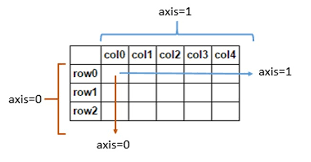

In [123]:
from IPython.display import Image
Image("axes.png", width = 400)

When you see axis 0, think about the direction down, or operations that change the number of rows.  Sometimes, you'll see people call this "along the rows."

When you see axis 1, think about the horizontal direction, or operations that change the number of columns.

If we want to drop the final grades, that changes the number of columns, and Python will need to scan the column names horizontally, so let's try axis = 1.

In [124]:
gradebook.drop('final', axis = 1)

,midterm
student,
Ben,88
May,78
Sue,92
Blake,56
Amy,79
Steve,92


It worked!  Notice that drop() returns a new DataFrame, so we'd have to save it back to gradebook to keep the change.

Let's try dropping a row to see what that looks like.

In [125]:
gradebook.drop('Ben', axis=0)

,midterm,final
student,,
May,78,82
Sue,92,51
Blake,56,85
Amy,79,91
Steve,92,79


DataFrames are also closely integrated with the matplotlib graphing library.  It's really easy to pull up histograms and scatterplots.

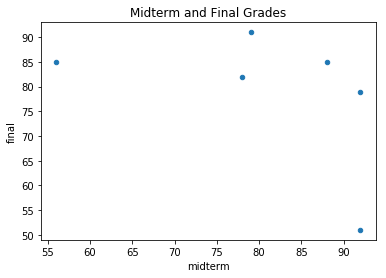

In [126]:
gradebook.plot.scatter(x='midterm', y='final')
plt.title("Midterm and Final Grades")

Imagine that you've done some data cleaning, and you're ready to save your work.  A good practice would be to save your `DataFrame` to a csv file, which is easy to do with the `to_cav()` method.

In [127]:
gradebook.to_csv("gradebook.csv")